<a href="https://colab.research.google.com/github/thinh18521442/CS114.K21/blob/master/Case_study_Folio_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Labraries**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import glob
import imageio 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Load Dataset**

In [3]:
class_names = os.listdir('/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio')



> Check class name


In [4]:
class_names

['bitter orange',
 'ashanti blood',
 'betel',
 'chrysanthemum',
 'beaumier du perou',
 'chocolate tree',
 'chinese guava',
 'caricature plant',
 'barbados cherry',
 'coeur demoiselle',
 'coffee',
 'duranta gold',
 'croton',
 'guava',
 'eggplant',
 'ficus',
 'hibiscus',
 'geranium',
 'fruitcitere',
 'jackfruit',
 'rose',
 'pomme jacquot',
 'papaya',
 'pimento',
 'ketembilla',
 'sweet olive',
 'mulberry leaf',
 'lychee',
 'star apple',
 'sweet potato',
 'thevetia',
 'vieux garcon']



> Write a function load_data



In [5]:
def load_data(path, X, y, result):
    for im_path in glob.glob(path):
        cv_img = cv2.imread(im_path);  
        img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)   
        img = cv2.resize(cv_img,(32,32))   
        X.append(np.array(img))
        y.append(np.array([result]))



> Function load_data have 4 parameters path, X, y, result </br> 

*   path: link to folder data
*   X: list of datas
*   y: list of labels
*   result: a number represent for label






In [6]:
X, y = [], []



> Run function load_data



In [7]:
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/ashanti blood/*", X, y, 0)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/barbados cherry/*", X, y, 1)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/beaumier du perou/*", X, y, 2)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/betel/*", X, y, 3)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/bitter orange/*", X, y, 4)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/caricature plant/*", X, y, 5)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/chinese guava/*", X, y, 6)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/chocolate tree/*", X, y, 7)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/chrysanthemum/*", X, y, 8)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/coeur demoiselle/*", X, y, 9)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/coffee/*", X, y, 10)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/croton/*", X, y, 11)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/duranta gold/*", X, y, 12)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/eggplant/*", X, y, 13)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/ficus/*", X, y, 14)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/fruitcitere/*", X, y, 15)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/geranium/*", X, y, 16)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/guava/*", X, y, 17)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/hibiscus/*", X, y, 18)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/jackfruit/*", X, y, 19)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/ketembilla/*", X, y, 20)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/lychee/*", X, y, 21)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/mulberry leaf/*", X, y, 22)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/papaya/*", X, y, 23)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/pimento/*", X, y, 24)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/pomme jacquot/*", X, y, 25)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/rose/*", X, y, 26)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/star apple/*", X, y, 27)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/sweet olive/*", X, y, 28)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/sweet potato/*", X, y, 29)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/thevetia/*", X, y, 30)
load_data("/content/drive/My Drive/Case_Study_Folio_Detection/Folio Leaf Dataset/Folio/vieux garcon/*", X, y, 31)



> Check dataset



In [8]:
X, y = np.array(X), np.array(y)

In [10]:
X.shape

(637, 32, 32, 3)



> Dataset which has 637 images RGB was resized by command 
  

```
img = cv2.resize(cv_img,(32,32))
```





In [11]:
y.shape

(637, 1)

#**Visualize data**

In [12]:
X_visual = []
y_visual = []
for i in range(len(X)):
    if y_visual.count(y[i]) == 0:
        X_visual.append(X[i])
        y_visual.append(y[i])

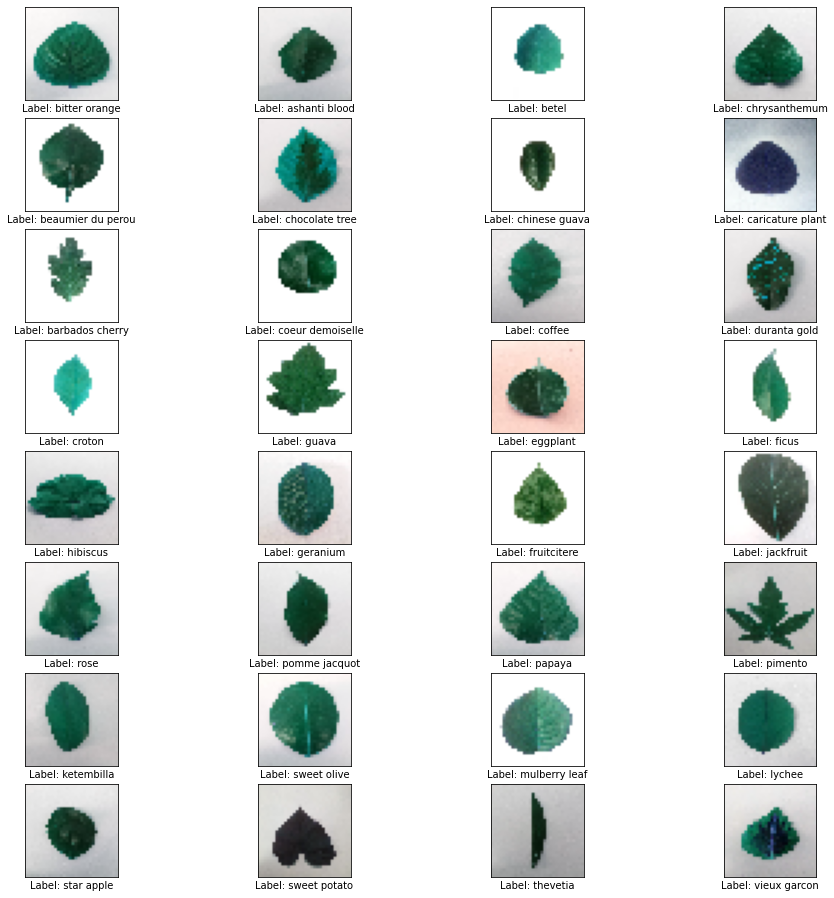

In [13]:
plt.figure(figsize=(16,16))
for i in range(len(X_visual)):
    plt.subplot(8,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_visual[i], cmap = plt.cm.binary)
    plt.xlabel('Label: %s' % class_names[y_visual[i][0]])

#**Split dataset**



> Using train_test_split to split dataset into 2 part train and test with test_size 20% and random_state 42





In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
print('Total Training images:', len(X_train))

Total Training images: 509


In [18]:
print('Total Test images:', len(X_test))

Total Test images: 128


#**Normalize data**



> Reshape data train from (509, 32, 32, 3) into 2D array



In [19]:
X_train_trans = X_train.reshape(X_train.shape[0], -1)
X_train_trans.shape

(509, 3072)



> Then we do the same thing with test set 



In [20]:
X_test_trans = X_test.reshape(X_test.shape[0], -1)
X_test_trans.shape

(128, 3072)



> Standar scaler data



In [21]:
SC = StandardScaler()

In [22]:
X_train_trans = SC.fit_transform(X_train_trans)

In [23]:
X_test_trans = SC.fit_transform(X_test_trans)

#**Build and train model Logistics regression using OvR**

In [24]:
model = LogisticRegression(random_state = 42, multi_class='ovr')

In [ ]:
model.fit(X_train_trans, y_train)

#**Evaluate model**

In [26]:
y_pred_train = model.predict(X_train_trans)
y_pred_train.shape

(509,)

In [27]:
y_pred_test = model.predict(X_test_trans)
y_pred_test.shape

(128,)



> Evaluation on train set



In [28]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        13
          17       1.00    



> Model fit in train set with accuracy 100%



Text(0.5, 1.0, 'Confusion matrix in Train data')

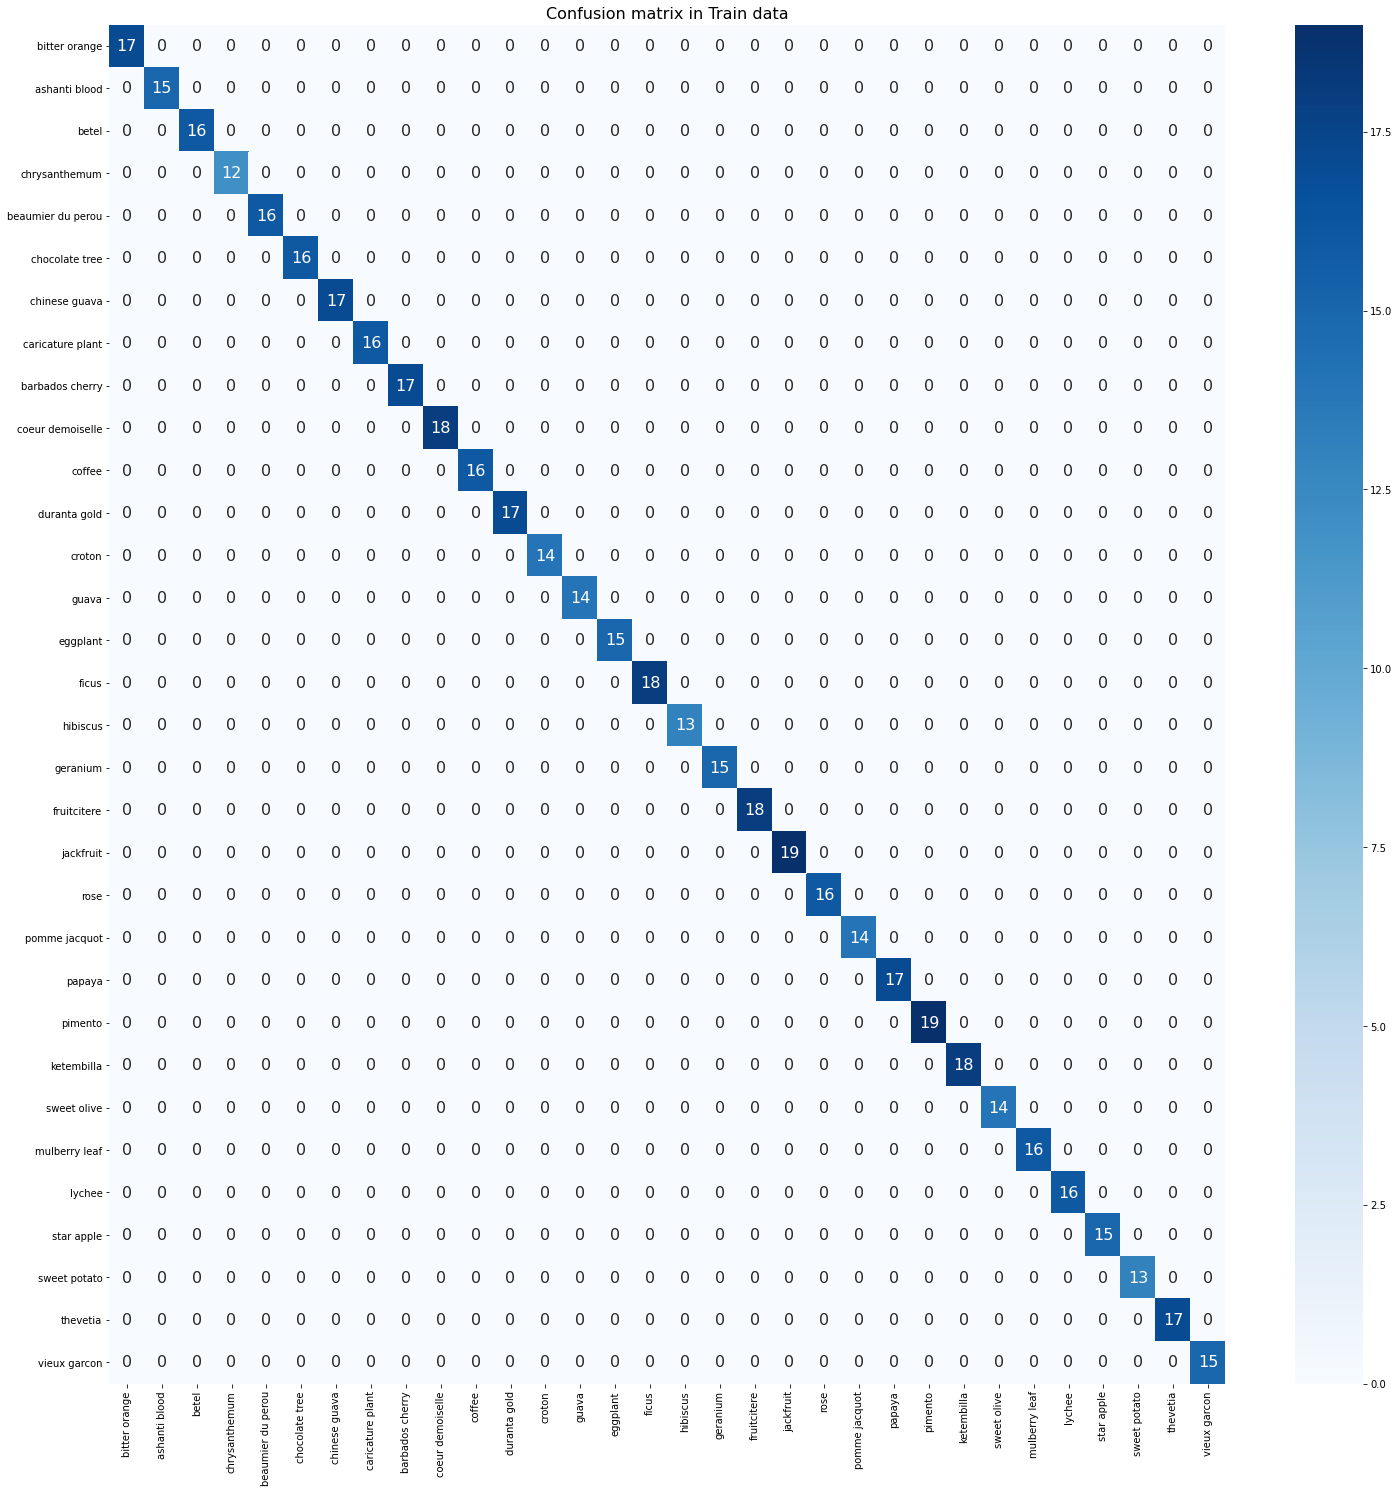

In [29]:
confusion_matrix(y_train, y_pred_train)
plt.figure(figsize = (25,25))
sns.heatmap(confusion_matrix(y_train, y_pred_train), cmap="Blues", annot = True, annot_kws = {"size": 16}, xticklabels = class_names, yticklabels = class_names)
plt.title('Confusion matrix in Train data', fontsize = 16)



> Evaluation on test set



In [30]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.80      0.80      0.80         5
           2       0.80      1.00      0.89         4
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         3
           9       1.00      0.50      0.67         2
          10       0.75      0.75      0.75         4
          11       1.00      1.00      1.00         3
          12       0.83      0.83      0.83         6
          13       1.00      0.50      0.67         4
          14       1.00      1.00      1.00         5
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         7
          17       0.83    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion matrix in Test data')

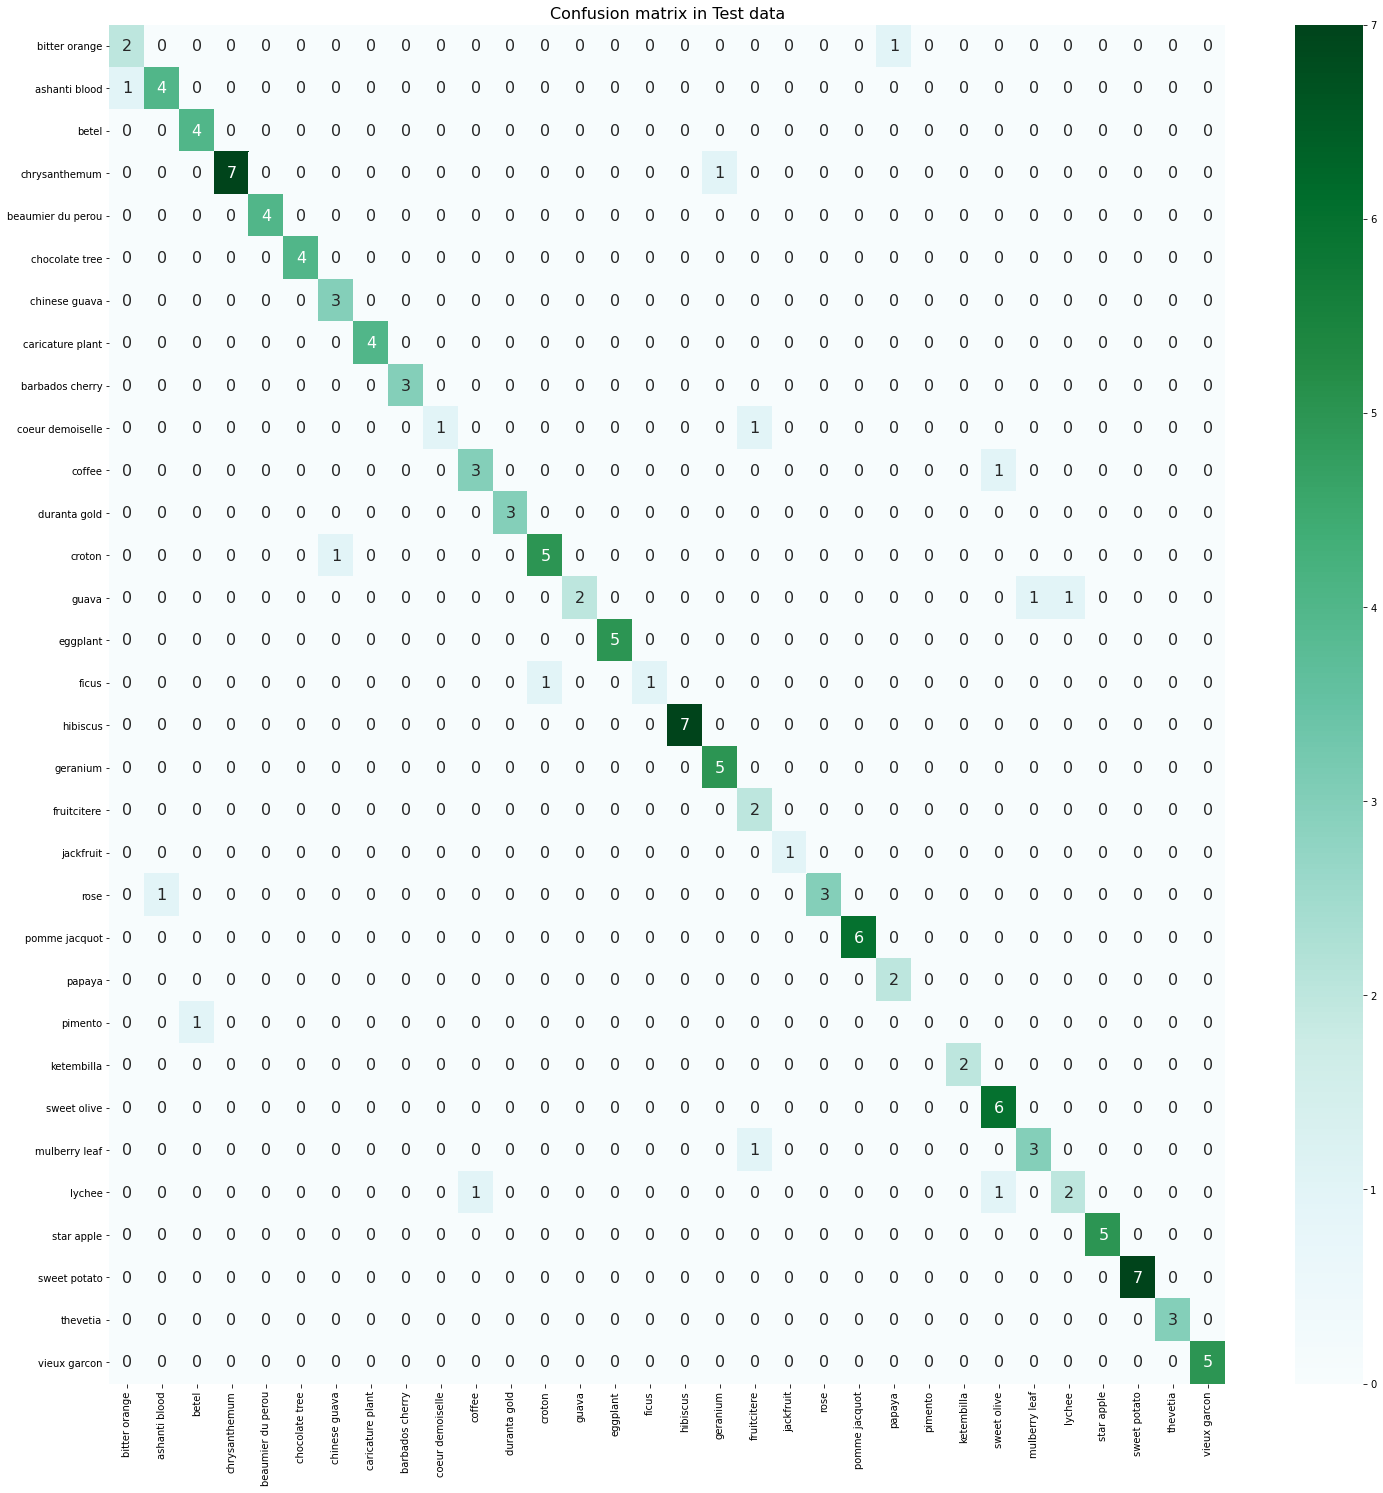

In [32]:
confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (25,25))
sns.heatmap(confusion_matrix(y_test, y_pred_test), cmap="BuGn", annot = True, annot_kws = {"size": 16}, xticklabels = class_names, yticklabels = class_names)
plt.title('Confusion matrix in Test data', fontsize = 16)



> The model showed quite high results on the test set with an accuracy of 89%





#**Make a prediction**

In [33]:
y_pred = []
for i in range(len(y_pred_test)):
    y_pred.append([y_pred_test[i]])

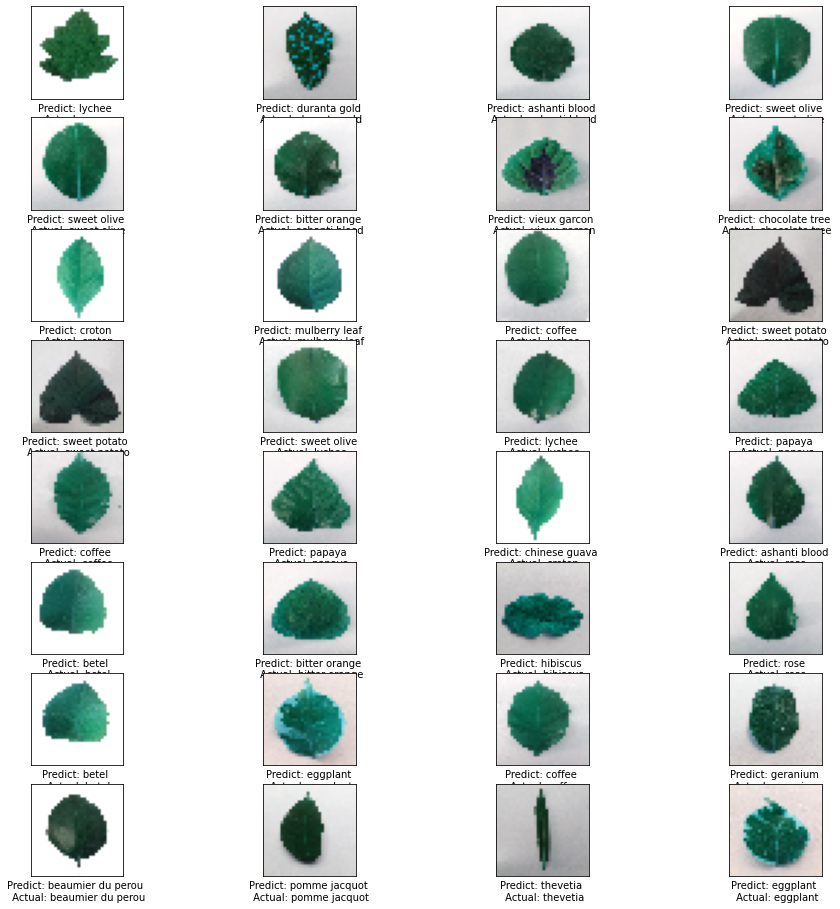

In [34]:
plt.figure(figsize=(16,16))
for i in range(32):
    plt.subplot(8,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i], cmap = plt.cm.binary)
    temp = [y_pred_test]
    plt.xlabel(
        'Predict: {predict} \n Actual: {actual}'.format(predict = class_names[y_pred[i][0]], actual = class_names[y_test[i][0]])
        )